In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
data = pd.read_csv('data.csv')

In [9]:
data.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [5]:
data.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [6]:
data.columns

Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price ', 'special requests',
       'date of reservation', 'booking status'],
      dtype='object')

### Rename columns

In [10]:
data.rename(columns={
    'Booking_ID': 'booking_id',
    'number of adults': 'adults',
    'number of children': 'children',
    'number of week nights': 'weekend_nights',
    'number of weekend nights': 'week_nights',
    'type of meal': 'meal_type',
    'car parking space': 'parking_space',
    'room type': 'room_type',
    'lead time': 'lead_time',
    'market segment type': 'market_segment',
    'average price ': 'average_price',
    'special requests': 'special_requests',
    'date of reservation': 'reservation_date',
    'booking status': 'booking_status'}, inplace=True)

In [ ]:
# data types
id_columns = ['booking_id']
numeric_colums = ['adults', 'children', 'weekend_nights', 'week_nights', 'lead_time', 'average_price', 'special_requests','P-C','P-not-C']
date_columns = ['reservation_date']
categorical_columns = ['meal_type', 'room_type', 'market_segment']
bool_columns = ['parking_space','booking_status']

### Data exploration and cleaning

In [8]:
data.columns

Index(['booking_id', 'adults', 'children', 'week_nights', 'weekend_nights',
       'meal_type', 'parking_space', 'room_type', 'lead_time',
       'market_segment', 'repeated', 'P-C', 'P-not-C', 'average_price',
       'special_requests', 'reservation_date', 'booking_status'],
      dtype='object')

### - booking_id

In [9]:
data['booking_id'].nunique(), data.shape[0]

(36285, 36285)

##### There are no duplicate booking ids

### - adults

In [11]:
data['adults'].value_counts()

adults
2    26110
1     7702
3     2318
0      139
4       16
Name: count, dtype: int64

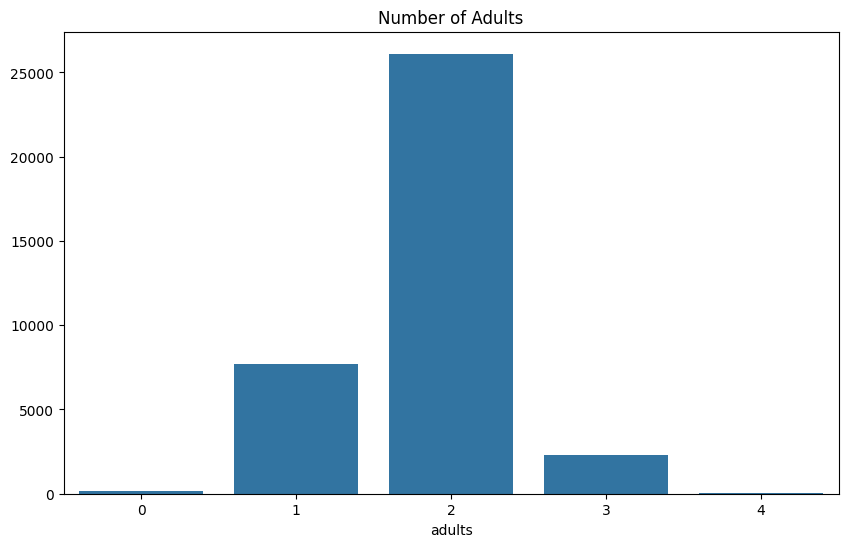

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data.adults.value_counts().index, y=data.adults.value_counts().values)
plt.title('Number of Adults')
plt.show()

### - children

In [12]:
data['children'].value_counts()

children
0     33583
1      1622
2      1058
3        19
9         2
10        1
Name: count, dtype: int64

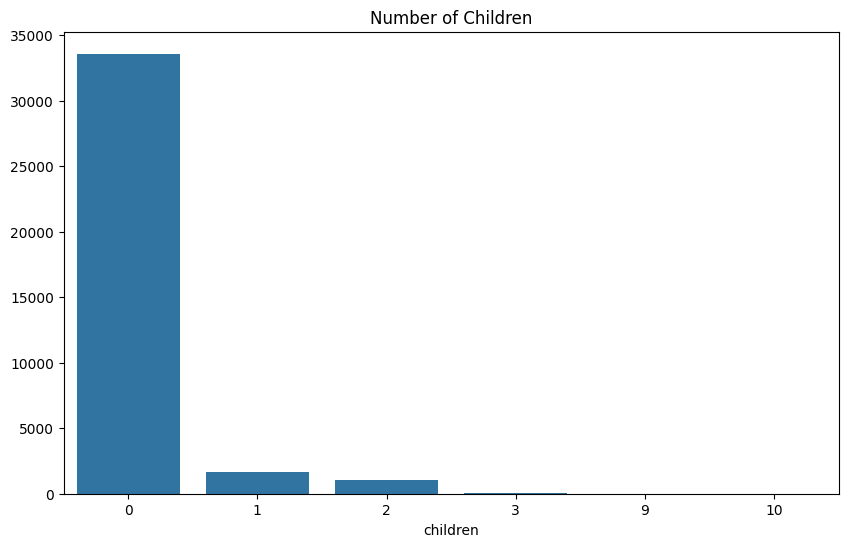

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data.children.value_counts().index, y=data.children.value_counts().values)
plt.title('Number of Children')
plt.show()

### - weekend_nights

In [13]:
data.weekend_nights.value_counts()

weekend_nights
2     11447
1      9488
3      7842
4      2992
0      2387
5      1616
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: count, dtype: int64

<Axes: xlabel='weekend_nights'>

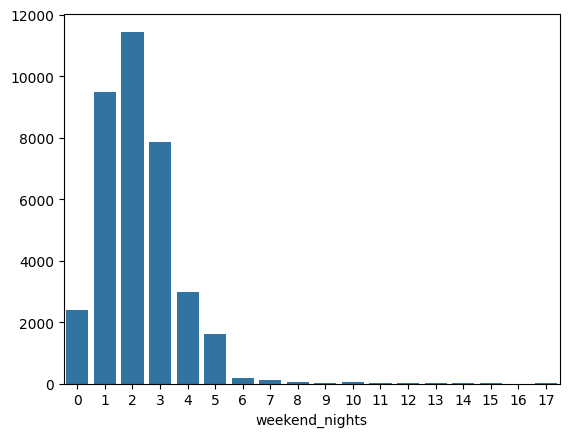

In [62]:
sns.barplot(x=data.weekend_nights.value_counts().index, y=data.weekend_nights.value_counts().values)

### - week_nights

In [24]:
data.week_nights.value_counts()

week_nights
0    16876
1    10000
2     9072
3      153
4      129
5       34
6       20
7        1
Name: count, dtype: int64

<Axes: xlabel='week_nights'>

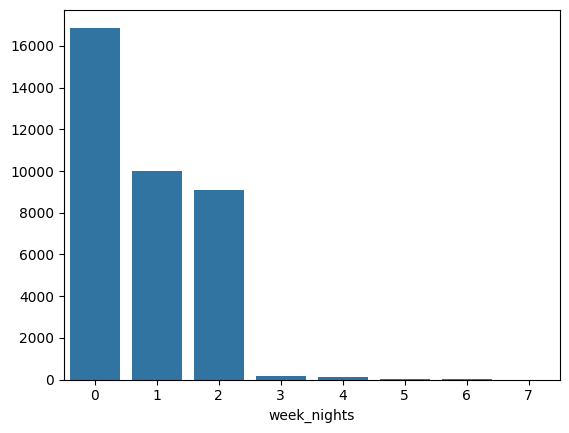

In [63]:
sns.barplot(x=data.week_nights.value_counts().index, y=data.week_nights.value_counts().values)

### Calcualte reservation duration

In [14]:
data.reservation_duration = data.weekend_nights + data.week_nights

C:\Users\acer\AppData\Local\Temp\ipykernel_8008\1249688880.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.reservation_duration = data.weekend_nights + data.week_nights


In [15]:
data.reservation_duration.describe()

count    36285.000000
mean         3.015296
std          1.786000
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         24.000000
dtype: float64

Text(0.5, 1.0, 'Distribution of Reservation Duration')

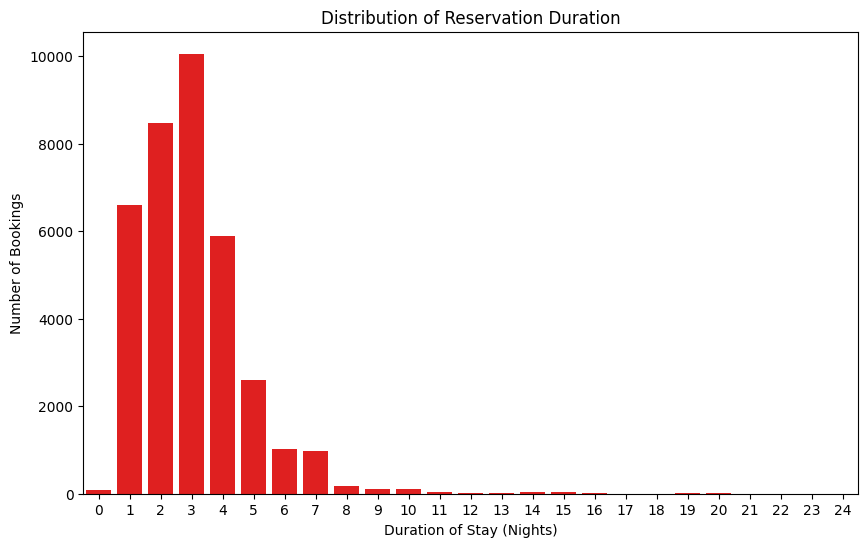

In [70]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data.reservation_duration.value_counts().index, y=data.reservation_duration.value_counts().values, color='red')
plt.xlabel('Duration of Stay (Nights)')
plt.ylabel('Number of Bookings')
plt.title('Distribution of Reservation Duration')

### - meal_type

In [26]:
data.meal_type.value_counts()

meal_type
Meal Plan 1     27842
Not Selected     5132
Meal Plan 2      3306
Meal Plan 3         5
Name: count, dtype: int64

Text(0, 0.5, 'Count')

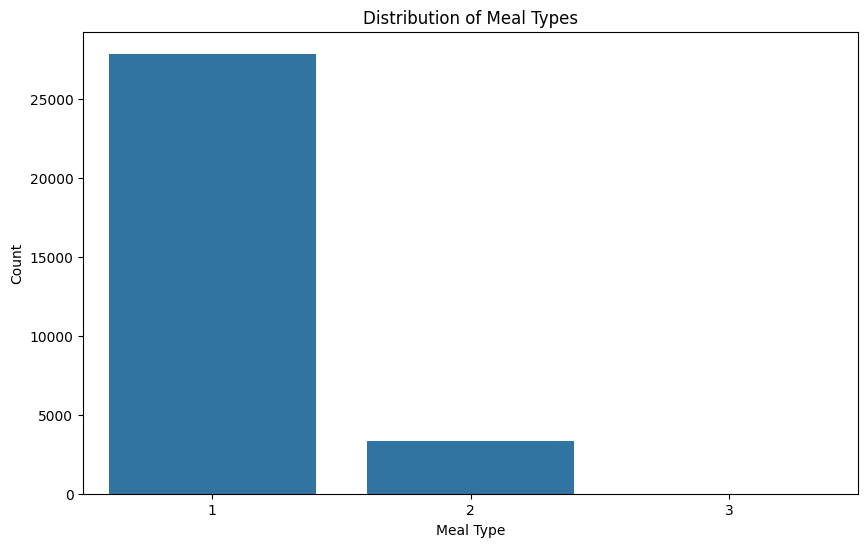

In [72]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data.meal_type.value_counts(dropna=False).index, 
            y=data.meal_type.value_counts(dropna=False).values)
plt.title('Distribution of Meal Types')
plt.xlabel('Meal Type')
plt.ylabel('Count')


In [18]:
# Extract the meal type from the meal_type column
data.meal_type = data['meal_type'].apply(lambda x: x.split(' ')[-1] if x.startswith('Meal Plan') else None)

### - parking_space

In [32]:
data.parking_space.value_counts()

parking_space
0    35161
1     1124
Name: count, dtype: int64

Text(0, 0.5, 'Count')

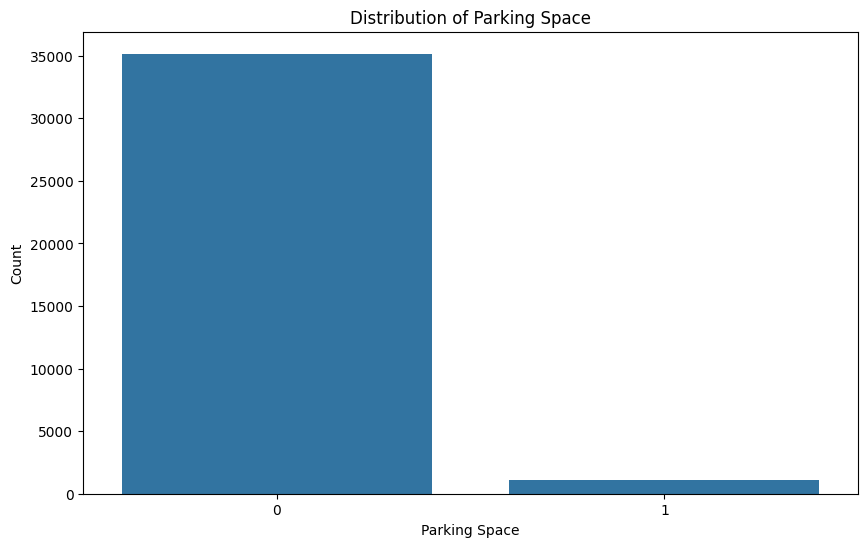

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data.parking_space.value_counts(dropna=False).index, 
            y=data.parking_space.value_counts(dropna=False).values)
plt.title('Distribution of Parking Space')
plt.xlabel('Parking Space')
plt.ylabel('Count')

### - room_type

In [34]:
data.room_type.value_counts()

room_type
Room_Type 1    28138
Room_Type 4     6059
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64

In [19]:
# Extract the room type from the room_type column
data.room_type = data['room_type'].apply(lambda x: x.split(' ')[-1])

Text(0, 0.5, 'Count')

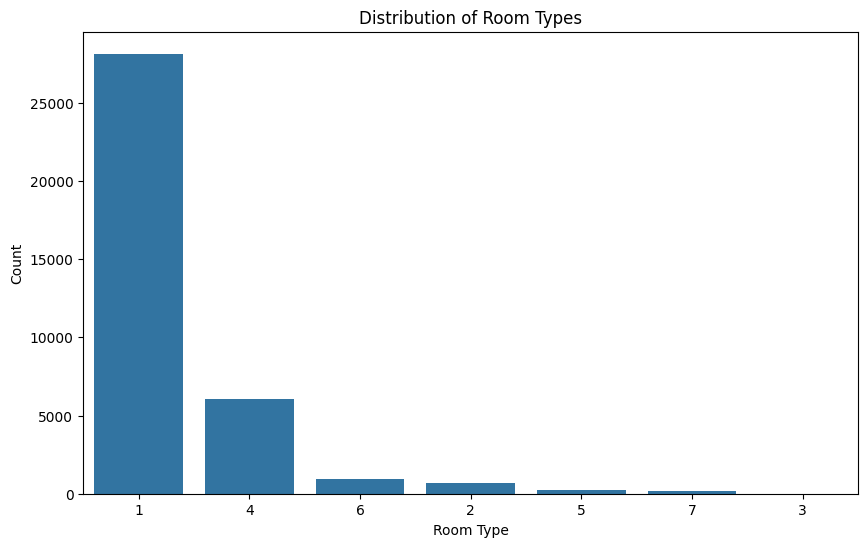

In [75]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data.room_type.value_counts().index, y=data.room_type.value_counts().values)
plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')


### lead_time

In [199]:
data.lead_time.describe()

count    36285.000000
mean        85.239851
std         85.938796
min          0.000000
25%         17.000000
50%         57.000000
75%        126.000000
max        443.000000
Name: lead_time, dtype: float64

Text(-3.6805555555555554, 0.5, 'Count')

<Figure size 1000x600 with 0 Axes>

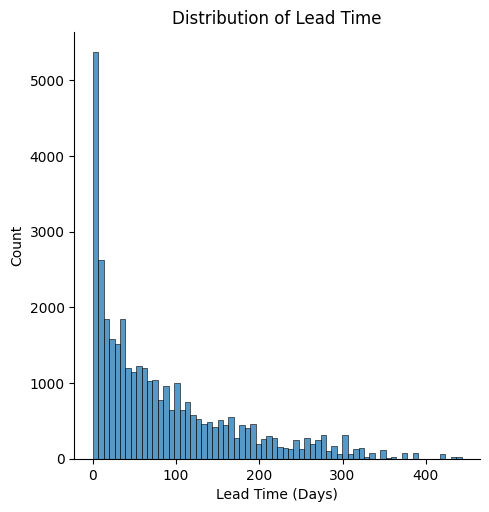

In [187]:
plt.figure(figsize=(10, 6))
sns.displot(data.lead_time)
plt.title('Distribution of Lead Time')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Count')

### market_segment

In [40]:
data.market_segment.value_counts()

market_segment
Online           23221
Offline          10531
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64

Text(0, 0.5, 'Count')

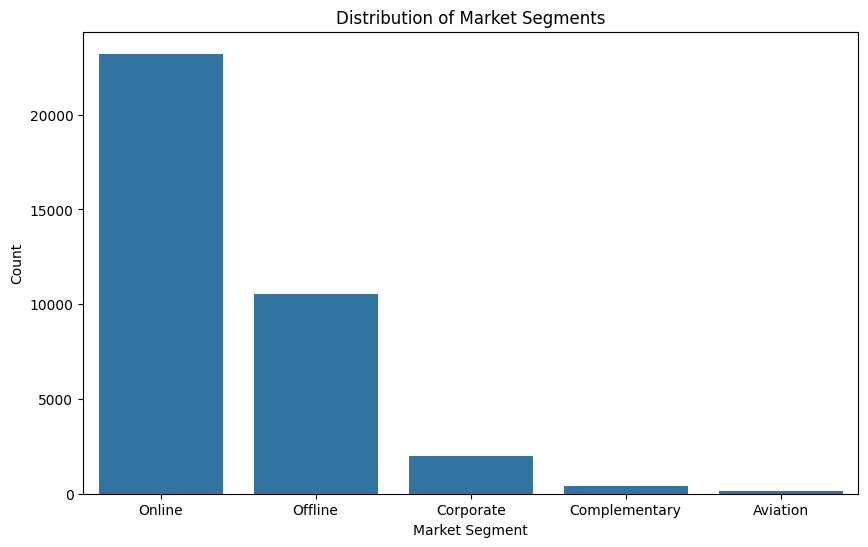

In [79]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data.market_segment.value_counts().index, y=data.market_segment.value_counts().values)
plt.title('Distribution of Market Segments')
plt.xlabel('Market Segment')
plt.ylabel('Count')


### repeated

In [42]:
data.repeated.value_counts()

repeated
0    35355
1      930
Name: count, dtype: int64

Text(0, 0.5, 'Count')

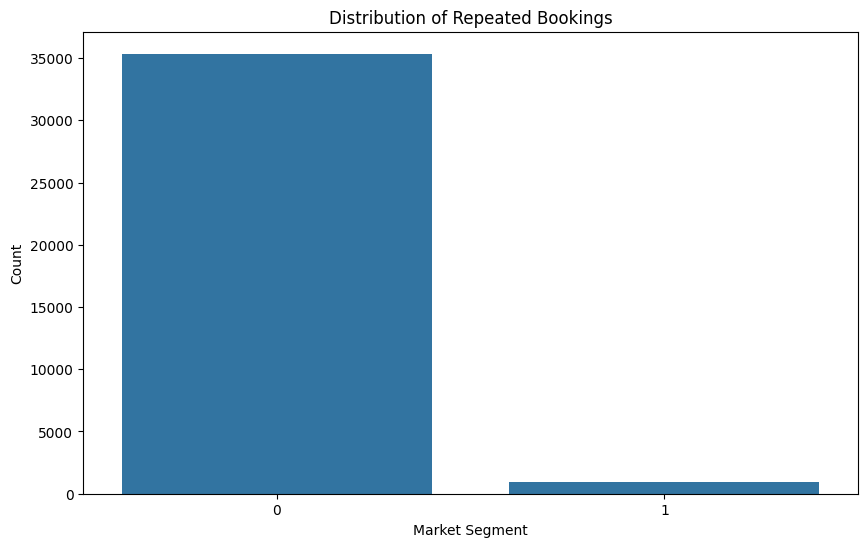

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data.repeated.value_counts().index, y=data.repeated.value_counts().values)
plt.title('Distribution of Repeated Bookings')
plt.xlabel('Market Segment')
plt.ylabel('Count')


### average_price

In [44]:
data.average_price.describe()

count    36285.000000
mean       103.421636
std         35.086469
min          0.000000
25%         80.300000
50%         99.450000
75%        120.000000
max        540.000000
Name: average_price, dtype: float64

Text(0, 0.5, 'Count')

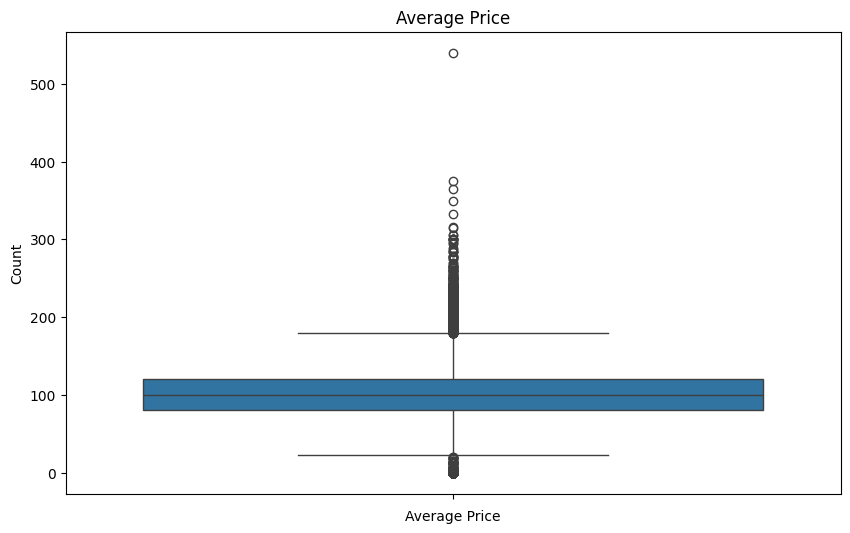

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(data.average_price)
plt.title('Average Price')
plt.xlabel('Average Price')
plt.ylabel('Count')

### special_requests

In [46]:
data.special_requests.value_counts()

special_requests
0    19780
1    11379
2     4364
3      676
4       78
5        8
Name: count, dtype: int64

Text(0, 0.5, 'Count')

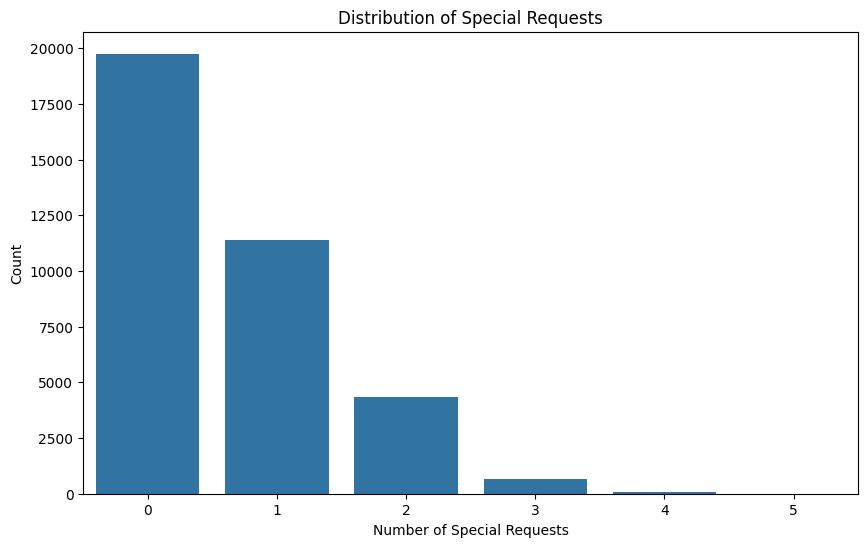

In [190]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data.special_requests.value_counts().index, y=data.special_requests.value_counts().values)
plt.title('Distribution of Special Requests')
plt.xlabel('Number of Special Requests')
plt.ylabel('Count')

### reservation_date

In [48]:
data.reservation_date.describe()

count          36285
unique           553
top       10/13/2018
freq             254
Name: reservation_date, dtype: object

In [83]:
data.reservation_date.min(), data.reservation_date.max()

('1/1/2018', '9/9/2018')

In [117]:
# Get unique date formats
def get_date_format(date_str):
    if '-' in date_str:
        return 'underscore_format'
    elif '/' in date_str:
        return 'splash_format'


# Date formats
print("Date Formats:")
print(data['reservation_date'].apply(get_date_format).value_counts())


Date Formats:
reservation_date
splash_format        36248
underscore_format       37
Name: count, dtype: int64


In [103]:
data[data.reservation_date.str.contains('-')]['reservation_date'].iloc[0]

'2018-2-29'

In [104]:
data[data.reservation_date.str.contains('/')]['reservation_date'].iloc[0]

'10/2/2015'

In [20]:
def unify_date_format(date):
    try:
        if '/' in date:
            month, day, year = date.split('/')
        elif '-' in date:
            year, month, day = date.split('-')
        month = '0' + month if len(month) == 1 else month
        day = '0' + day if len(day) == 1 else day
        return pd.to_datetime(year + '-' + month + '-' + day, errors='coerce')
    except:
        day = day - 1
        return pd.to_datetime(year + '-' + month + '-' + day, errors='coerce')
         

data['reservation_date'] = data['reservation_date'].apply(lambda x: unify_date_format(x))

In [191]:
# Reservations per year
yearly_data = data.copy(deep=True)
yearly_data.set_index('reservation_date', inplace=True)
yearly_data = yearly_data.groupby(pd.Grouper(freq='YE')).agg({'booking_id': 'count'})
yearly_data.reset_index(inplace=True)
yearly_data

,reservation_date,booking_id
0,2015-12-31,1
1,2016-12-31,1
2,2017-12-31,6516
3,2018-12-31,29730


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, '2017-05-31'),
  Text(1, 0, '2017-06-30'),
  Text(2, 0, '2017-07-31'),
  Text(3, 0, '2017-08-31'),
  Text(4, 0, '2017-09-30'),
  Text(5, 0, '2017-10-31'),
  Text(6, 0, '2017-11-30'),
  Text(7, 0, '2017-12-31'),
  Text(8, 0, '2018-01-31'),
  Text(9, 0, '2018-02-28'),
  Text(10, 0, '2018-03-31'),
  Text(11, 0, '2018-04-30'),
  Text(12, 0, '2018-05-31'),
  Text(13, 0, '2018-06-30'),
  Text(14, 0, '2018-07-31'),
  Text(15, 0, '2018-08-31'),
  Text(16, 0, '2018-09-30'),
  Text(17, 0, '2018-10-31'),
  Text(18, 0, '2018-11-30'),
  Text(19, 0, '2018-12-31')])

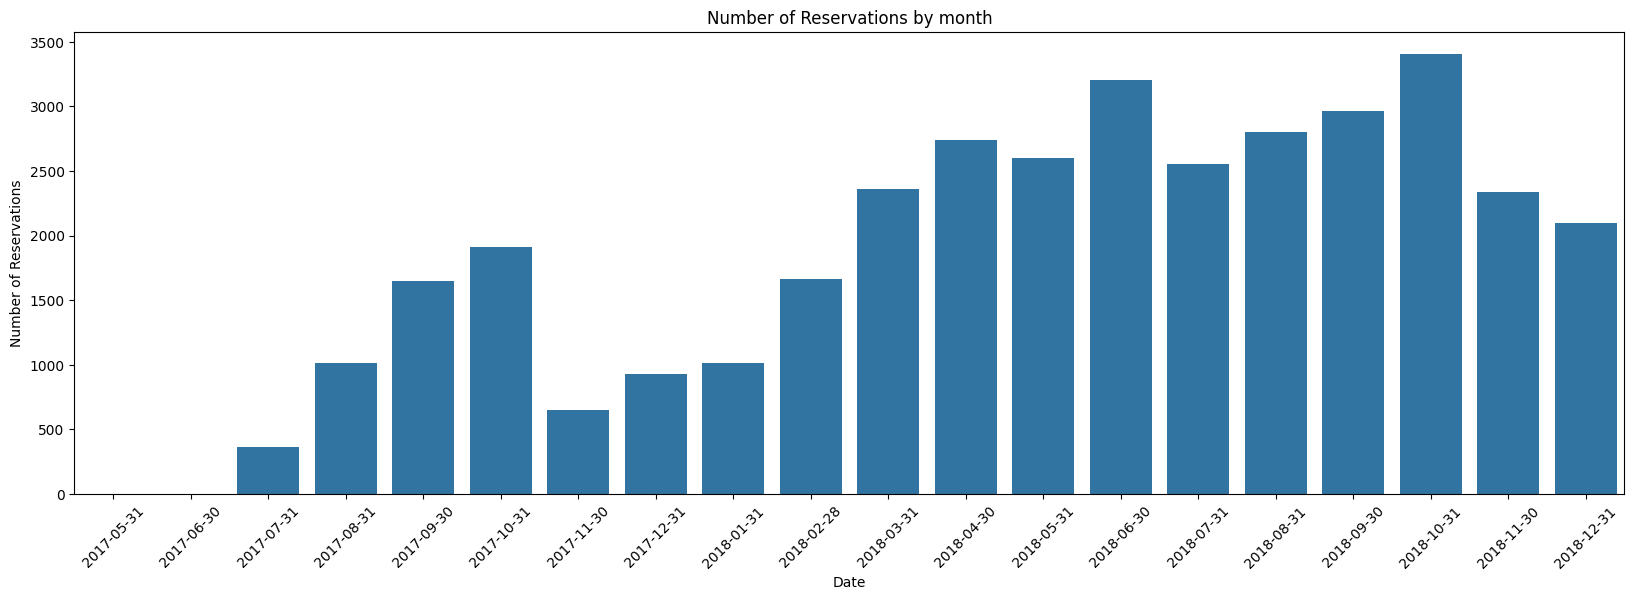

In [ ]:
# Group by week and count
monthly_data = data[data.reservation_date >= '2017-01-01'].copy(deep=True)
monthly_data.set_index('reservation_date', inplace=True)
monthly_data = monthly_data.groupby(pd.Grouper(freq='ME')).agg({'booking_id': 'count'})
monthly_data.reset_index(inplace=True)

# # Create the plot
plt.figure(figsize=(20, 6))
sns.barplot(x=monthly_data.reservation_date, y=monthly_data.booking_id)
plt.title('Number of Reservations by month')
plt.xlabel('Date')
plt.ylabel('Number of Reservations')
plt.xticks(rotation=45)

### P-C

In [54]:
data['P-C'].value_counts()

P-C
0     35947
1       198
2        46
3        43
11       25
5        11
4        10
13        4
6         1
Name: count, dtype: int64

In [55]:
data['P-not-C'].value_counts()

P-not-C
0     35473
1       228
2       112
3        80
4        65
5        60
6        36
7        24
8        23
10       19
9        19
11       15
12       12
14        9
15        8
16        7
13        7
18        6
20        6
21        6
17        6
19        6
22        6
25        3
27        3
24        3
23        3
44        2
29        2
48        2
28        2
30        2
32        2
31        2
26        2
46        1
55        1
45        1
57        1
53        1
54        1
58        1
41        1
40        1
43        1
35        1
50        1
56        1
33        1
37        1
42        1
51        1
38        1
34        1
39        1
52        1
49        1
47        1
36        1
Name: count, dtype: int64

In [21]:
data['P-C'].describe()

count    36285.000000
mean         0.023343
std          0.368281
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         13.000000
Name: P-C, dtype: float64

In [22]:
data['P-not-C'].describe()

count    36285.000000
mean         0.153369
std          1.753931
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         58.000000
Name: P-not-C, dtype: float64

### booking_status

In [23]:
data.booking_status.value_counts()

booking_status
Not_Canceled    24396
Canceled        11889
Name: count, dtype: int64

In [24]:
# Convert booking status to binary
data.booking_status = data['booking_status'].apply(lambda x: 0 if x == 'Canceled' else 1)

Text(0, 0.5, 'Count')

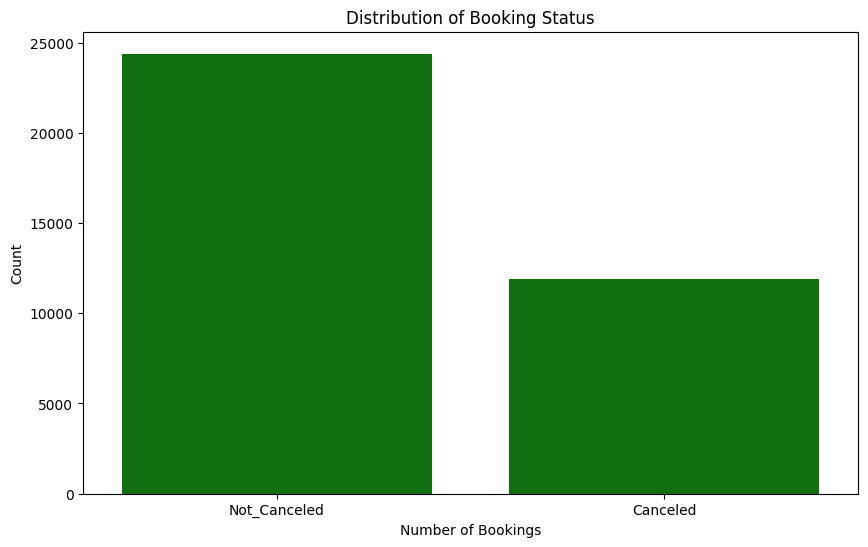

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data.booking_status.value_counts().index, y=data.booking_status.value_counts().values,color='green')
plt.title('Distribution of Booking Status')
plt.xlabel('Number of Bookings')
plt.ylabel('Count')